In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.__version__

'1.5.3'

### DataFrame 구조
- index(row) - column(column) - data

In [3]:
num_list = [10, 20, 30, 40, 50]
pd.DataFrame(num_list)

,0
0,10
1,20
2,30
3,40
4,50


In [4]:
double_list = [[1000, '과자','2019-12-31','반품'],
 [2000, '음료', '2020-03-02', '정상'],
 [3000, '아이스크림', '2020-02-03','정상'],
 [1000,'과자','2019-12-31','반품']]
pd.DataFrame(data = double_list)

,0,1,2,3
0,1000,과자,2019-12-31,반품
1,2000,음료,2020-03-02,정상
2,3000,아이스크림,2020-02-03,정상
3,1000,과자,2019-12-31,반품


In [5]:
pd.DataFrame(data=double_list, columns=['가격','종류','판매일자','반품여부'])

,가격,종류,판매일자,반품여부
0,1000,과자,2019-12-31,반품
1,2000,음료,2020-03-02,정상
2,3000,아이스크림,2020-02-03,정상
3,1000,과자,2019-12-31,반품


In [6]:
double_columns = ['가격','종류','판매일자','반품여부']
df_saledays = pd.DataFrame(data=double_list, columns=double_columns)
df_saledays

,가격,종류,판매일자,반품여부
0,1000,과자,2019-12-31,반품
1,2000,음료,2020-03-02,정상
2,3000,아이스크림,2020-02-03,정상
3,1000,과자,2019-12-31,반품


In [7]:
type(df_saledays)

pandas.core.frame.DataFrame

In [8]:
df_saledays_dropcol = df_saledays.drop(columns=['종류', '판매일자',])

In [9]:
df_saledays_dropcol

,가격,반품여부
0,1000,반품
1,2000,정상
2,3000,정상
3,1000,반품


In [10]:
len(df_saledays.index)

4

In [11]:
df_saledays.values

array([[1000, '과자', '2019-12-31', '반품'],
       [2000, '음료', '2020-03-02', '정상'],
       [3000, '아이스크림', '2020-02-03', '정상'],
       [1000, '과자', '2019-12-31', '반품']], dtype=object)

In [12]:
single_data = [0.1, 0.2, 0.3, 0.4, 0.5]
pd.Series(data=single_data)

0    0.1
1    0.2
2    0.3
3    0.4
4    0.5
dtype: float64

In [13]:
single_data = [0.1, 0.2, 0.3, 0.4, 0.5]
series_floats = pd.Series(data=single_data)
series_floats

0    0.1
1    0.2
2    0.3
3    0.4
4    0.5
dtype: float64

In [14]:
type(series_floats)

pandas.core.series.Series

In [15]:
df_saledays_dropcol

,가격,반품여부
0,1000,반품
1,2000,정상
2,3000,정상
3,1000,반품


In [16]:
## 필터
# condition = df_saledays_dropcol["반품여부"] == '정상'
condition = (df_saledays["가격"] >= 2500)
df_saledays.loc[condition]

,가격,종류,판매일자,반품여부
2,3000,아이스크림,2020-02-03,정상


In [17]:
(df_saledays["가격"] >= 2500) | (df_saledays["가격"] <= 1000) # 특정 범위 선택할 때 사용

0     True
1    False
2     True
3     True
Name: 가격, dtype: bool

In [18]:
(df_saledays["반품여부"] == '정상') & (df_saledays["가격"] >= 2500)

0    False
1    False
2     True
3    False
dtype: bool

## 요약

In [19]:
df_saledays_dropcol.pivot_table(index='반품여부', values='가격')

,가격
반품여부,
반품,1000
정상,2500


In [20]:
pd.pivot_table(df_saledays_dropcol, index='반품여부', values='가격')

,가격
반품여부,
반품,1000
정상,2500


In [21]:
pd.pivot_table(df_saledays_dropcol, index='반품여부', values='가격', aggfunc=np.sum)

,가격
반품여부,
반품,2000
정상,5000


### 통계 수치 표현

In [22]:
import numpy as np

In [23]:
single_data = [0.1, 0.2, 0.3, 0.4, 0.5]
single_floats = pd.Series(single_data)
series_floats

0    0.1
1    0.2
2    0.3
3    0.4
4    0.5
dtype: float64

In [24]:
arr = np.array([6, 4, 1, 3, 5, 3, 10, 7, 9])
arr

array([ 6,  4,  1,  3,  5,  3, 10,  7,  9])

In [25]:
np.mean(arr)

5.333333333333333

In [26]:
np.std(arr)

2.788866755113585

In [27]:
np.median(arr)

5.0

In [28]:
## 최소값, 최대값
np.min(arr), np.max(arr)

(1, 10)

In [29]:
np.var(arr)

7.777777777777778

In [30]:
np.sum(arr)

48

In [31]:
df_saledays.pivot_table(index=['반품여부', '종류'], values='가격', aggfunc=[np.sum, np.min, np.size])

sum  amin size
              가격    가격   가격
반품여부 종류                    
반품   과자     2000  1000    2
정상   아이스크림  3000  3000    1
     음료     2000  2000    1

In [32]:
df_saledays.transpose()

,0,1,2,3
가격,1000,2000,3000,1000
종류,과자,음료,아이스크림,과자
판매일자,2019-12-31,2020-03-02,2020-02-03,2019-12-31
반품여부,반품,정상,정상,반품


In [33]:
def mean_subtraction(cell_value):
    result = abs(1750 - cell_value)
    return result

In [34]:
df_saledays['가격'].apply(mean_subtraction)

0     750
1     250
2    1250
3     750
Name: 가격, dtype: int64

In [44]:
df_saledays.loc[:,['가격차이']] = mean_subtraction(df_saledays['가격'])
df_saledays

,가격,종류,판매일자,반품여부,가격차이
0,1000,과자,2019-12-31,반품,750
1,2000,음료,2020-03-02,정상,250
2,3000,아이스크림,2020-02-03,정상,1250
3,1000,과자,2019-12-31,반품,750


In [45]:
df_saledays['가격'] + df_saledays['가격차이']

0    1750
1    2250
2    4250
3    1750
dtype: int64

### IQR

In [36]:
data = np.array([44, 32, 53, 75, 36, 45, 25, 49, 46, 28])

In [37]:
Q1 = np.percentile(data, 25)

In [38]:
Q3 = np.percentile(data, 75)

In [39]:
Q1, Q3

(33.0, 48.25)

In [40]:
Q3 - Q1

15.25

In [41]:
np.median(data)

44.5

In [42]:
import seaborn as sns
import matplotlib as plt

<Axes: >

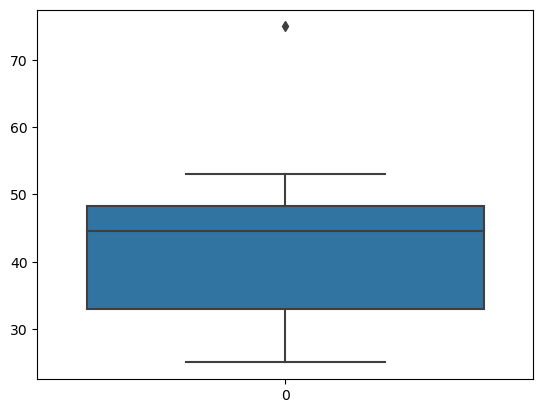

In [43]:
sns.boxplot(data=data)